In [188]:
import pandas as pd
import numpy as np 
from math import sqrt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [189]:
#Подавим вывод предупреждений
import warnings
warnings.filterwarnings('ignore')

## Напомню содержательный смысл названий столбцов.

* N – номер квартиры по порядку

* Rooms – число комнат

* Price – цена

* Totsp – общая площадь квартиры, кв. м.

* Livesp – жилая площадь квартиры, кв. м.

* Kitsp – площадь кухни, кв. м.

* Dist – расстояние от центра в км. 

* Metrdist – расстояние до метро в минутах

* Walk – 1 – если пешком от метро, 0 – если на транспорте

* Brick – 1 – кирпичный/монолит/жб, 0 – другой

* Tel – 1 – если есть, 0 – нет

* Bal – 1 – есть балкон/лоджия, 0 – нет

* Floor – номер этажа, на котором расположена квартира

* Nfloors – всего этажей в доме

* New – 1 – первичный рынок, 0 - вторичка


**Напомню численные обозначения округов Москвы**:
* 0 - ЦАО
* 1 - САО
* 2 - СВАО
* 3 - ВАО
* 4 - ЮВАО
* 5 - ЮАО
* 6 - ЮЗАО
* 7 - ЗАО
* 8 - СЗАО
* 9 - НАО
* 10 - ТАО

### Загрузим полученные данные

In [190]:
data = pd.read_csv('flats_parsing.csv')

In [191]:
data.head()

,N,District,Price,Rooms,Totsp,Livesp,Kitsp,Brick,Floor,Nfloors,Dist,Metrdist,Walk,Bal,Tel,New
0,1,0,35584000,2,70.0,43.9,8.0,1,4,6,1.09,5,1,0,-,0
1,2,0,49000000,3,70.0,40.5,10.0,1,8,9,1.32,7,1,1,-,1
2,3,0,241316340,5,200.6,-,-,1,3,5,4.57,6,1,0,1,1
3,4,0,4585315,1,17.3,17.3,-,0,2,-,4.74,6,1,0,-,0
4,5,0,4814581,1,17.3,17.3,-,1,2,6,4.77,5,1,0,0,1


In [192]:
data.tail()

,N,District,Price,Rooms,Totsp,Livesp,Kitsp,Brick,Floor,Nfloors,Dist,Metrdist,Walk,Bal,Tel,New
8927,8928,10,3600000,1,43.0,16.0,12.0,1,2,4,40.37,-,0,1,0,1
8928,8929,10,3600000,1,42.0,20.0,10.0,1,7,16,32.67,-,0,1,-,0
8929,8930,10,3600000,1,42.3,16.0,10.0,1,4,4,40.24,30,0,1,-,1
8930,8931,10,3600000,3,105.0,55.0,18.0,1,1,6,36.40,-,0,1,0,1
8931,8932,10,3650000,1,36.0,20.0,10.0,0,2,12,33.99,-,0,0,0,1


In [193]:
len(data)

8932

**Имеем 8932 квартир по всем округам Москвы.**

In [194]:
#Типы данных колонок
data.dtypes

N             int64
District      int64
Price         int64
Rooms        object
Totsp       float64
Livesp       object
Kitsp        object
Brick         int64
Floor         int64
Nfloors      object
Dist        float64
Metrdist     object
Walk          int64
Bal           int64
Tel          object
New           int64
dtype: object

## Исключим из рассмотрения квартиры с пропусками. В этих данных пропуску соответствует '-'.

In [195]:
for col in data.columns:
    if '-' in data[col].unique():
        data=data.drop(data[data[col] == '-'].index, axis = 0)

In [196]:
data.head()

,N,District,Price,Rooms,Totsp,Livesp,Kitsp,Brick,Floor,Nfloors,Dist,Metrdist,Walk,Bal,Tel,New
6,7,0,5500000,1,32.0,20.0,7.0,0,1,9,4.88,4,1,0,1,1
11,12,0,6000000,1,35.1,20.1,9.6,0,12,12,5.12,10,0,1,1,1
12,13,0,6100000,1,34.0,21.0,8.0,1,2,5,5.96,12,1,1,1,1
13,14,0,6100000,1,36.0,20.0,10.0,0,12,12,5.12,10,1,1,1,1
15,16,0,6300000,1,35.0,18.0,8.0,0,1,4,5.95,12,0,0,1,1


In [197]:
data.tail()

,N,District,Price,Rooms,Totsp,Livesp,Kitsp,Brick,Floor,Nfloors,Dist,Metrdist,Walk,Bal,Tel,New
8871,8872,10,74000000,3,236.0,120.0,45.0,1,5,6,34.20,15,1,1,0,1
8877,8878,10,2600000,2,54.0,32.0,10.0,1,2,4,66.66,40,0,1,0,1
8905,8906,10,2600000,2,51.1,36.0,15.0,1,3,3,39.46,50,0,0,0,1
8911,8912,10,3200000,1,53.0,18.0,16.0,0,4,17,72.39,25,0,1,0,1
8923,8924,10,3500000,1,42.3,16.0,10.0,1,1,4,40.18,20,0,1,0,1


In [198]:
# Убедимся, что удалены квартиры с пропусками
counter = 0
for col in data.columns:
    if '-' in data[col].unique():
        counter+=1
print(counter)

0


## Хорошо. В данных нет теперь пропусков. 

### Число квартир после очистки от пропусков:

In [199]:
len(data)

3661

In [200]:
data.dtypes

N             int64
District      int64
Price         int64
Rooms        object
Totsp       float64
Livesp       object
Kitsp        object
Brick         int64
Floor         int64
Nfloors      object
Dist        float64
Metrdist     object
Walk          int64
Bal           int64
Tel          object
New           int64
dtype: object

In [201]:
#Преобразуем столбцы с типом object во float
data['Rooms'] = data['Rooms'].astype(str).astype(float)
data['Livesp'] = data['Livesp'].astype(str).astype(float)
data['Kitsp'] = data['Kitsp'].astype(str).astype(float)
data['Nfloors'] = data['Nfloors'].astype(str).astype(float)
data['Metrdist'] = data['Metrdist'].astype(str).astype(float)
data['Tel'] = data['Tel'].astype(str).astype(int)

In [202]:
data.dtypes

N             int64
District      int64
Price         int64
Rooms       float64
Totsp       float64
Livesp      float64
Kitsp       float64
Brick         int64
Floor         int64
Nfloors     float64
Dist        float64
Metrdist    float64
Walk          int64
Bal           int64
Tel           int64
New           int64
dtype: object

In [203]:
def num_cat(data):
    for name in data.columns:
        print(str(name) + ':' + ' ' + str(data[name].nunique()))
#Количество уникальных значений в столбцах 
num_cat(data)

N: 3661
District: 11
Price: 651
Rooms: 5
Totsp: 546
Livesp: 391
Kitsp: 135
Brick: 2
Floor: 36
Nfloors: 45
Dist: 1749
Metrdist: 52
Walk: 2
Bal: 2
Tel: 2
New: 1


### Удивительно то, что после очистки от пропусков, остались только квартиры-первички.

# Подсчитаем основные статистики.

In [204]:
data.drop(['N','District','Brick','Walk','Bal','Tel','New'],axis=1).describe()

,Price,Rooms,Totsp,Livesp,Kitsp,Floor,Nfloors,Dist,Metrdist
count,3.661000e+03,3661.000000,3661.000000,3661.000000,3661.000000,3661.000000,3661.000000,3661.000000,3661.000000
mean,9.592331e+06,1.852226,51.066457,30.618601,8.762141,6.283256,11.875171,14.060186,11.980060
std,1.131348e+07,0.811639,22.974122,15.403934,3.606497,5.124762,6.532181,9.335304,9.292184
min,1.399444e+06,1.000000,13.000000,9.000000,1.000000,1.000000,1.000000,0.180000,1.000000
25%,5.900000e+06,1.000000,38.000000,20.000000,6.000000,3.000000,8.000000,8.070000,7.000000
50%,7.400000e+06,2.000000,45.000000,28.900000,8.000000,5.000000,12.000000,12.310000,10.000000
75%,9.750000e+06,2.000000,57.000000,35.000000,10.000000,9.000000,16.000000,17.560000,15.000000
max,3.900000e+08,5.000000,537.000000,333.000000,55.000000,51.000000,62.000000,72.510000,210.000000


# Корреляционная карта

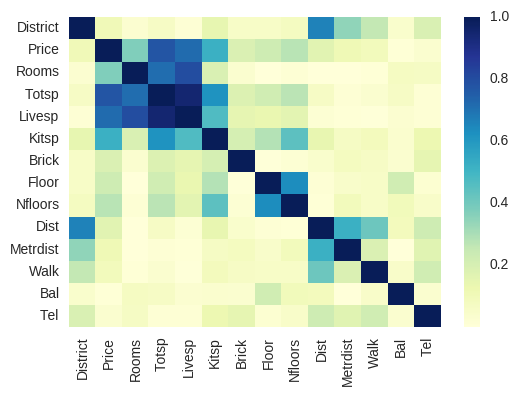

In [205]:
corr = abs(data.drop(['N','New'],1).corr())
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot=False, cmap='YlGnBu')

# Выборочое распределение значений признаков. 


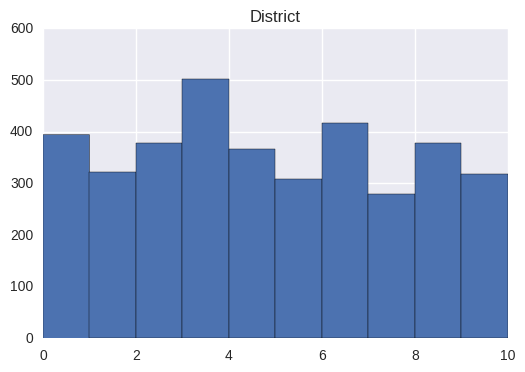

In [206]:
plt.figure()
plt.title("District")
data["District"].hist()

### Количество квартир по районам распределено более менее равномерно.

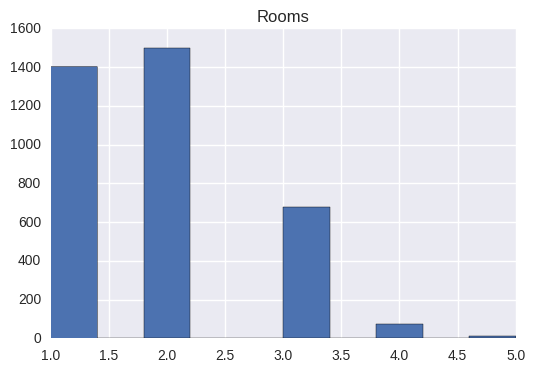

In [207]:
plt.figure()
plt.title("Rooms")
data["Rooms"].hist()

### Большинство квартир выставленных на продажу являются 1- и 2-комнатными.

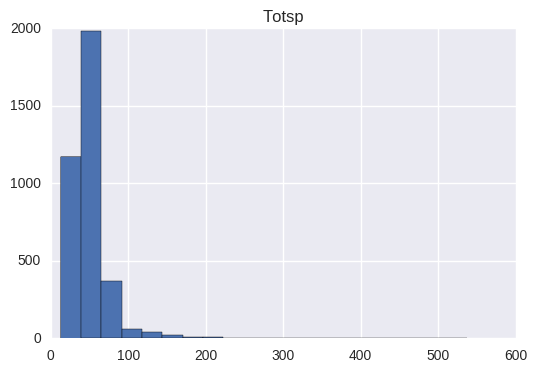

In [208]:
plt.figure()
plt.title("Totsp")
data["Totsp"].hist(bins=20)

### Общая площадь большинства квартир, выставленных на продажу, в основном не превосходит 100 кв. м. 

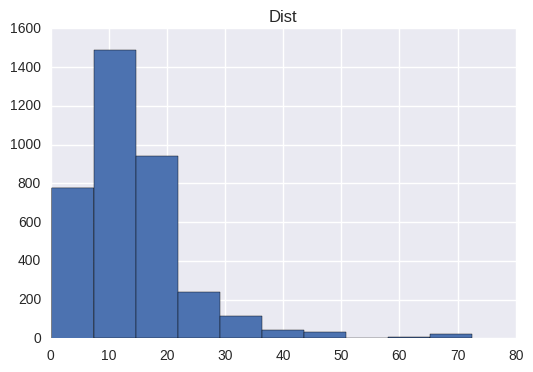

In [209]:
plt.figure()
plt.title("Dist")
data["Dist"].hist()

## Зависимость цены квартиры от её общей площади.

(0, 400000000.0)

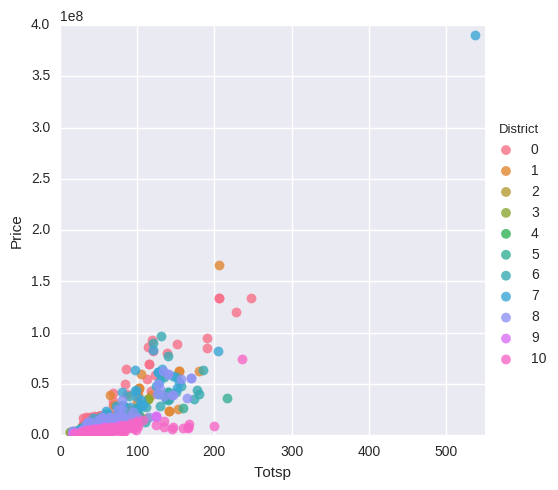

In [210]:
lm=sns.lmplot(x='Totsp',y='Price', hue='District', data=data, legend=True, fit_reg=False, scatter_kws={"s": 50})
lm.axes[0,0].set_xlim(0,550)
lm.axes[0,0].set_ylim(0,4e8)

### Очень дорогая квартира за 390 млн. руб. общей площадью 537 кв. м.  находится в ЗАО. 

### Квартиры за более чем 100 млн. руб. находятся в ЦАО и САО.

### В НАО и ТАО квартиры в основном до 2 млн. руб.

# Зависимость цены квартиры от её расстояния до центра.

(0, 400000000.0)

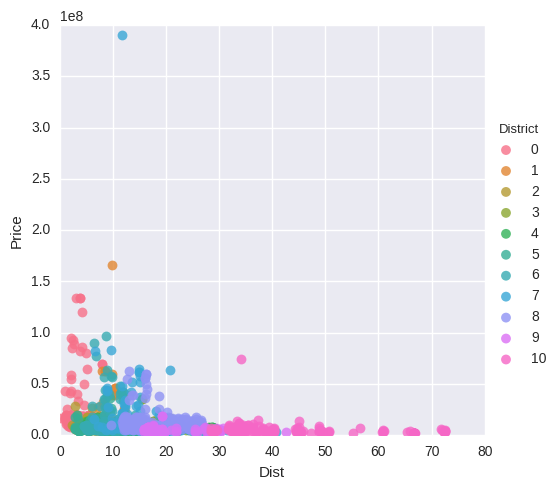

In [211]:
lm=sns.lmplot(x='Dist',y='Price', hue='District', data=data, legend=True, fit_reg=False, scatter_kws={"s": 50})
lm.axes[0,0].set_xlim(0,80)
lm.axes[0,0].set_ylim(0,4e8)

# *Построение моделей.*

### В качестве целевой переменной будет выступать цена на квартиру - price.

## Метрика качества модели.
## root-mean-square error (RMSE):

In [212]:
def RMSE(x1,x2):
    return sqrt(mean_squared_error(x1,x2))

In [213]:
#Обучающая выборка
X = data.drop(['N','Price'],1).values
y = data['Price'].values

# Линейная регрессия.

In [214]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error

In [215]:
lin_reg = LinearRegression(normalize = True, n_jobs=-1)

In [216]:
#Качество линейной регрессии на кросс-валидации по пяти блокам
scores = cross_val_score(lin_reg, X, y, scoring = make_scorer(score_func = RMSE, greater_is_better=False), cv = 5 )
print(np.mean(scores))

-6382072.0909


# Гребневая регрессия.

In [217]:
from sklearn.linear_model import Ridge

In [218]:
#найдём значение пар-ра alpha из диапазона 1 -- 500, при котором RMSE нашей модели будет наименьшим
ridge_reg = Ridge(alpha=0, normalize=True)
scores = cross_val_score(ridge_reg, X, y, scoring = make_scorer(score_func = RMSE, greater_is_better=False), cv = 5 )
best_score = abs(np.mean(scores))
best_alpha = 0
for alpha in range(1,5000): 
    #качество гребневой регрессии на кросс-валидации по пяти блокам
    ridge_reg = Ridge(alpha=alpha, normalize=True)
    scores = cross_val_score(ridge_reg, X, y, scoring = make_scorer(score_func = RMSE, greater_is_better=False), cv = 5 )
    if abs(np.mean(scores)) < best_score:
        best_score = abs(np.mean(scores))
        best_alpha = alpha

In [219]:
best_score

6382072.0908958828

# Случайный лес.

In [146]:
from sklearn.ensemble import RandomForestRegressor

### Жадный поиск параметров модели:

In [149]:
RF = RandomForestRegressor(n_estimators=1000, criterion='mse', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=5, max_leaf_nodes=None, min_impurity_split=1e-07, bootstrap=True, oob_score=False, n_jobs=-1, random_state=241, verbose=0, warm_start=False)

scores = cross_val_score(RF, X, y, scoring = make_scorer(score_func = RMSE, greater_is_better=False), cv = 3 )

best_score = abs(np.mean(scores))

best_max_features = 5 #буду варьировать от 5 до 14
best_min_samples_split = 2 #буду варьировать от 2 до 10
best_min_samples_leaf=1  #буду варьировать от 1 до 5

for max_features in range(5,15):
    for min_samples_split in range(2,11):
        for min_samples_leaf in range(1,6):
            RF = RandomForestRegressor(n_estimators=1000,
                                       min_samples_split=min_samples_split, 
                                       min_samples_leaf=min_samples_leaf,
                                       max_features=max_features,
                                       n_jobs=-1,
                                       random_state=241)
            #качество случайного леса на кросс-валидации по пяти блокам
            scores = cross_val_score(RF, X, y, scoring = make_scorer(score_func = RMSE, greater_is_better=False), cv = 3)
            if abs(np.mean(scores)) < best_score:
                best_max_features = max_features
                best_min_samples_split = min_samples_split
                best_min_samples_leaf = min_samples_leaf

            

In [150]:
best_score

7381896.0934373178

In [154]:
best_max_features

14

In [155]:
best_min_samples_split

10

In [156]:
best_min_samples_leaf

5

In [151]:
#Cлучайный лес с наилучшими найденными параметрами
RF_best = RandomForestRegressor(n_estimators = 1000,
                                min_samples_split = best_min_samples_split, 
                                min_samples_leaf = best_min_samples_leaf,
                                max_features = best_max_features, 
                                n_jobs = -1,
                                random_state = 241)

# Важность признаков.

In [152]:
RF_best.fit(X,y)
feature_importances = RF_best.feature_importances_

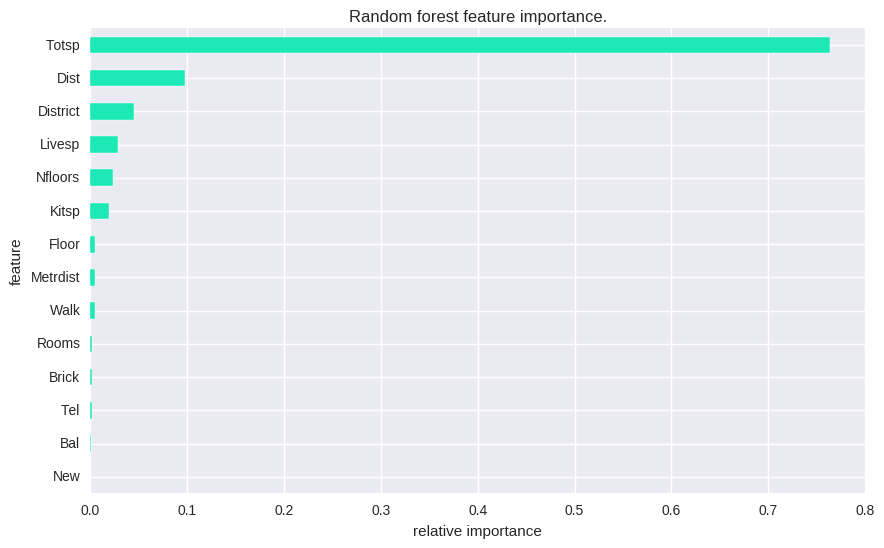

In [153]:
df_fi = pd.DataFrame({"feature": data.drop(['N','Price'],1).columns,'importance':feature_importances})
df_fi = df_fi.sort_values('importance')

plt.figure()
df_fi.plot(kind='barh',
                     x='feature',
                     y='importance',
                     sort_columns=False,
                     legend=False,
                     figsize=(10, 6),
                     facecolor='#1DE9B6',
                     edgecolor='white')

plt.title('Random forest feature importance.')
plt.xlabel('relative importance')